# Data Preparation

Disini kita akan mengimport dataset ke dalam kode kita. Tidak hanya itu, dalam data preparation kita akan mempertimbangkan untuk menghapus kolom, menentukan kolom yang benar benar diperlukan dalam kasus ini. Begitu pula untuk cleaning data, seperti penanganan apakah terdapat data yang kosong, data yang berbeda atau keluar dari ukuran aslinya (outlier), dan data yang terduplikasi. Beberapa masalah pada data tersebut dapat membuat proses pembelajaran / training mesin kita menjadi terganggu dan hasilnya kurang akurat.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# mengakses file data csv
df = pd.read_csv("Iris_wclass.csv")

# melihat sebagian data
df.head() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# melihat informasi type data dan variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# menyiapkan variable sebelumnya agar bisa divisualisasikan ke depannya
pure_data = df.copy()

# menghilangkan atribut yang tidak dibutuhkan
df.drop(columns="Id", inplace=True)
df.head() # mleihat data setelah diubah

# menyimpan perubahan agar dapat ditampilkan
selected_data = df.head()

Untuk kebutuhan labeling maka perlu diketahui karakteristik setiap label misalnya rata rata dari setosa, virginica, versicolor

In [5]:
# untuk mengetahui isi class labelnya saja
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
df[df["Species"] == 'Iris-setosa'].drop(columns="Species").mean()

SepalLengthCm    5.006
SepalWidthCm     3.418
PetalLengthCm    1.464
PetalWidthCm     0.244
dtype: float64

In [11]:
df[df["Species"] == 'Iris-versicolor'].drop(columns="Species").mean()

SepalLengthCm    5.936
SepalWidthCm     2.770
PetalLengthCm    4.260
PetalWidthCm     1.326
dtype: float64

In [12]:
df[df["Species"] == 'Iris-virginica'].drop(columns="Species").mean()

SepalLengthCm    6.588
SepalWidthCm     2.974
PetalLengthCm    5.552
PetalWidthCm     2.026
dtype: float64

Berdasarkan dari hasil analisa tentunya kita bisa lihat pada setiap category itu memiliki karakteristiknya masing masing dan memiliki ketegasannya. Ketika kita lihat dari ataukus
- setosa, ukuran setal pendek dari yang lain, dan ukuran petal sangat kecil
- versicolor, ukuran setal sedang dari yang lain, dan ukuran petal sedang
- virginica, ukuran setal panjang dari yang lain, dan ukuran petal sangat besar

dengan ini kita bisa melabeli clusternya nanti

dikarenakan sudah tidak dibutuhkan lagi labelnya maka kita bisa membuangnya (karena algoritma ini clustering)

In [23]:
df.drop(columns="Species", inplace=True)

kita coba melihat scatter antar variable. Disini saya memutuskan untuk memilih jumlah variable nya itu semua dikarenakan untuk memberikan karakteristik yang tegas dan jelas pada setiap cluster

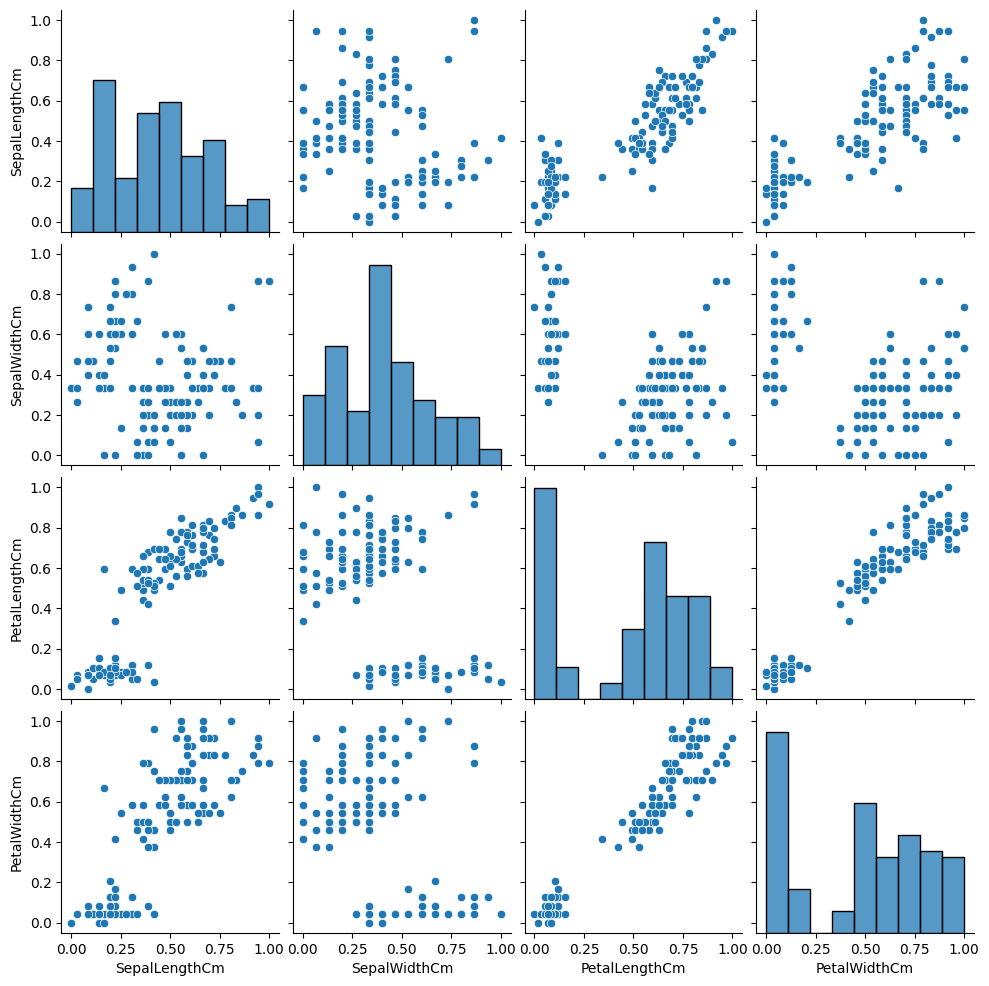

In [42]:
sns.pairplot(df)

Lalu selanjutnya akan dilakukan pencarian data apakah terdapat outlier atau tidak dengan cara melihatnya dengan boxplot

<Axes: ylabel='SepalLengthCm'>

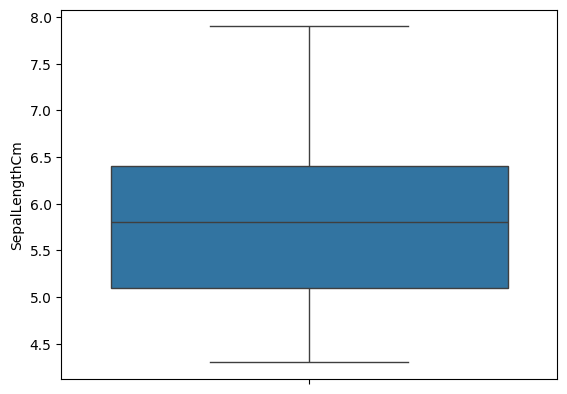

In [44]:
sns.boxplot(df["SepalLengthCm"])

<Axes: ylabel='SepalWidthCm'>

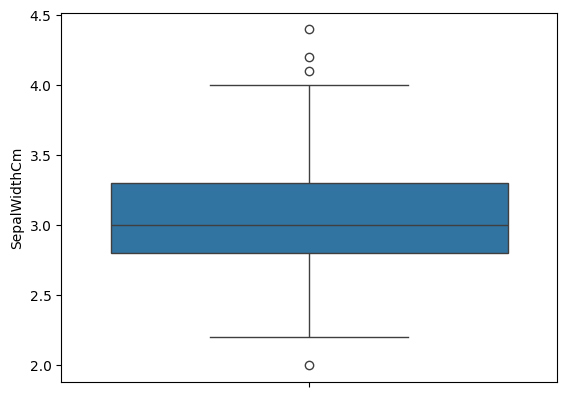

In [14]:
sns.boxplot(df["SepalWidthCm"])

<Axes: ylabel='PetalWidthCm'>

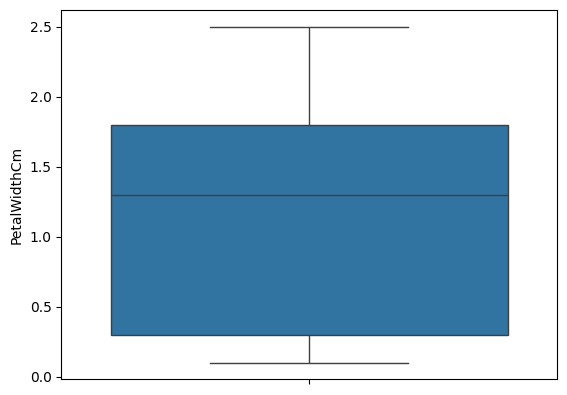

In [45]:
sns.boxplot(df["PetalWidthCm"])

<Axes: ylabel='PetalLengthCm'>

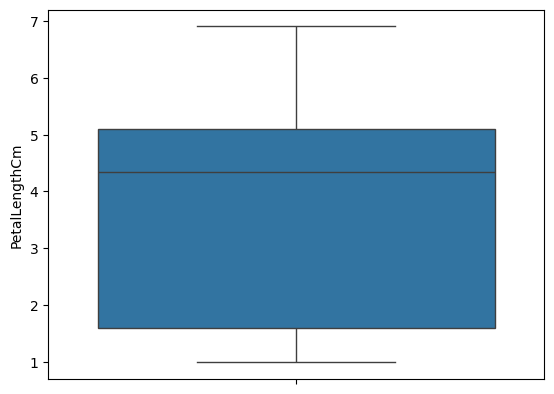

In [15]:
sns.boxplot(df["PetalLengthCm"])

In [19]:
# artinya timpa dataframe yang didalamnya tidak ada outlier pada sepalwidth (outlier dibawah 2.5 dan lebih dari 4)
df = df[~((df["SepalWidthCm"] < 2.5) | (df["SepalWidthCm"] > 4.0))]

maka ketika dilihat lagi, outliernya sudah tidak ada

<Axes: ylabel='SepalWidthCm'>

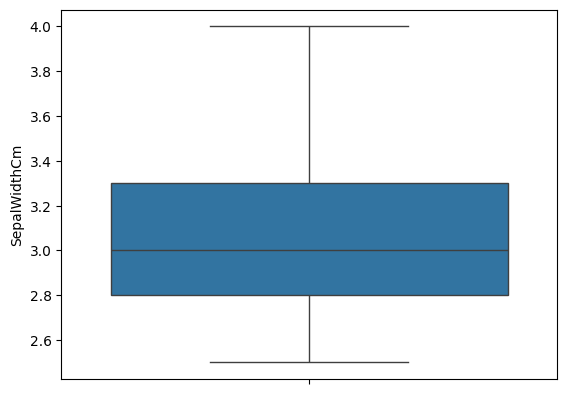

In [20]:
sns.boxplot(df["SepalWidthCm"])

berhubungan ada satu outlier yang kita temukan yakni pada sepalwidth. Maka kita perlu menghapusnya karena sangat mengganggu training. Ciri outlier maka akan terdapat titik titik di bawah dan di atas box nya.

dalam proses preparation data juga diperlukan untuk melihat apakah ada data yang hilang nilainya

In [24]:
# melihat apakah terdapat data yang kosong
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

In [25]:
# melihat apakah ada data kosong
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

perlu dipertimbangkan juga untuk melihat apakah ada data yang terduplikasi atau tidak

In [26]:
# mengecek duplikasi
df[df.duplicated()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
34,4.9,3.1,1.5,0.1
37,4.9,3.1,1.5,0.1
142,5.8,2.7,5.1,1.9


berhubungan ditemukan data terduplikasi maka kita perlu menanganinya dengan menghapus salah satu dari duplikasi tersebut

In [27]:
df.drop([34, 142], inplace=True)

In [28]:
# melihat data yang terduplikasi
df[df.duplicated()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
37,4.9,3.1,1.5,0.1


# Data Preprocessing

Dalam tahapan ini kita perlu menyiapkan agar data lebih mudah dipahami dan dimengerti oleh komputer. Selain itu, tujuan data preprocessing adalah membuat setiap variable dapat berkontribusi perhitungan yang sama dengan variable yang lain.

In [29]:
# normalisasi data (mengubah value masing2 data menjadi 0-1)
for col in df.columns:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

# menyimpan perubahan agar dapat digunakan
normalize_data = df.head()

df.head() # melihat data lagi

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.666667,0.067797,0.041667
1,0.166667,0.333333,0.067797,0.041667
2,0.111111,0.466667,0.050847,0.041667
3,0.083333,0.400000,0.084746,0.041667
4,0.194444,0.733333,0.067797,0.041667


melakukan pemisahan data train dan data test dengan tujuan untuk dapat mengujikan model dengan data test
disini saya memutuskan untuk menggunakan data train 80% dikarenakan

In [30]:
# untuk memisahkan data test dan data train
def Train_test_split(x, random_seed=None, test_size=0.7):
    # bisa dilakukan random dengan seed
    if random_seed:
        np.random.seed(random_seed)

    test_size = int(test_size * x.shape[0]) # membuat ukurannya sesuai dg persentase dataset
    indices = np.random.permutation(x.shape[0]) # membuat numpy yang random
    train_indices, test_indices = indices[:test_size], indices[test_size:] # membagi menjadi train dan test
    return x.iloc[train_indices], x.iloc[test_indices] # mengembalikan data train dan data test

data_train, data_test = Train_test_split(df, 42, 0.8)
data_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
143,0.694444,0.466667,0.830508,0.916667
76,0.694444,0.200000,0.644068,0.541667
118,0.944444,0.066667,1.000000,0.916667
20,0.305556,0.600000,0.118644,0.041667
47,0.083333,0.466667,0.067797,0.041667
...,...,...,...,...
66,0.361111,0.333333,0.593220,0.583333
88,0.361111,0.333333,0.525424,0.500000
36,0.333333,0.666667,0.050847,0.041667
144,0.666667,0.533333,0.796610,1.000000


# Data Training

pada tahapan data training ini, data sudah siap untuk diolah. Dalam proses ini mesin akan memahami data dan berdasarkan algoritma yang dibuat. Pada tahapan ini mesin akan mencoba memisahkan data berdasarkan pola kedekatan atribut sehingga dapat membuat grup / cluster. Setiap cluster itu memiliki karakteristik yang berbeda beda dan unik.

In [31]:
# membuat kelas / template untuk kmeans
class Kmeans():
    def __init__(self, n_cluster=2, max_iteration=100):
        # jumlah kluster
        self.n_cluster = n_cluster 
        # maksimal iterasi pada training
        self.max_iteration = max_iteration 
        # pusat kluster
        self.centroid = None 
        # untuk hasil label cluster
        self.label = None   
        # untuk perhitungan error wcss
        self.inertia = 0 
        # untuk melakukan prediksi dengan label
        self.labels = []

    def fit(self, x):
        # mencari pusat cluster secara random
        self.centroid = np.random.uniform(np.amin(x, axis=0), np.amax(x, axis=0), size=(self.n_cluster, x.shape[1]))

        # melakukan perulangan dan iterasi
        for iteration in range(self.max_iteration):
            # mereset kembali isi label
            self.label = []
            # mereset jarak cluster terdekat
            distances_cluster = []

            # menghitung jarak pada setiap item
            for item in x:
                # menghitung jarak centroid dengan setiap item
                distance = np.sqrt(np.sum((item - self.centroid)**2, axis=1))
                distances_cluster.append(distance.min()) # menyimpan untuk menyimpan jarak terkecil
                cluster = np.argmin(distance) # mencari label cluster
                self.label.append(cluster)
            
            # menyiapkan array untuk memisahkan grup
            groups = []

            # merubahnya ke matriks numpy agar bisa diperhitungkan 
            distances_cluster = np.array(distances_cluster)
            self.label = np.array(self.label)

            # melakukan pemisahan antar cluster dengan menyimpan banyak baris yang beda
            for i in range(self.n_cluster):
                groups.append(np.argwhere(self.label == i))

            new_centroid = []
            sum_distance = []

            # untuk setiap group / cluster akan dilakukan pengecekan 
            for i, indices in enumerate(groups):
                if len(indices) == 0: # jika group sudah tak punya member gunakan centroid sebelumny
                    new_centroid.append(self.centroid[i]) 
                else:
                    # menghitung jarak error
                    sum_distance.append(np.sum(distances_cluster)**2)
                    # centroid akan berubah sesuai dengan rata rata data
                    new_centroid.append(np.mean(x[indices], axis=0)[0])
            
            # melihat rata rata error
            self.inertia = np.mean(sum_distance)

            # jika perubahan centroid antara iterasi ini dengan iterasi seblumnya sudah 
            # tidak banyak berubah maka hentikan
            if np.max(np.abs(np.array(new_centroid) - self.centroid)) < 0.0001:
                break
            else:
                # jika tidak maka update centroid baru
                self.centroid = np.array(new_centroid)

    def predict(self, x ):
        if not self.labels: # jika model masih belum dilabeli
            raise "model still not labeled" # akan memunculkan error

        x = np.array(x) # agar dapat dilakukan proses matematika
        # menghitung jarak centroid dengan setiap item
        distance = np.sqrt(np.sum((x - self.centroid)**2))
        cluster =  np.argmin(distance) # menghitung label cluster
        return self.labels[cluster]

    def create_label(self, label): # digunakan untuk melabeli model jika sudah diketahui karekteristiknya
        self.labels = label


# Evaluasi

dalam tahapan ini kita akan mencari tau jumlah k yang optimal dengan menggunakan elbow method analisis, kita mampu menemukan jumlah k yang baik. Metode ini mencari penurunan paling kecil dan selisih nya besar dari k yang sebelumnya.

In [38]:
# menyiapkan wcss yang dapat disimpan
wcss = []

# akan mencoba nilai k mulai dari 1-10 dan disimpan di list
for k in range(1, 11):
    kmean = Kmeans(n_cluster=k)
    kmean.fit(data_train.to_numpy())
    wcss.append(kmean.inertia)

Text(0, 0.5, 'wcss')

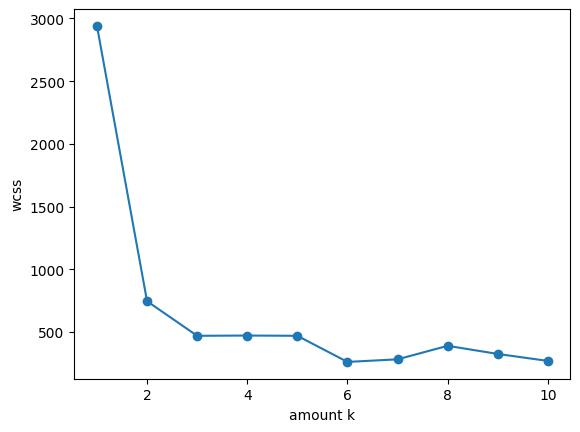

In [39]:
# menampilkan grafik elbow agar dapat menemukan jumlah k yang baik
plt.plot(np.arange(1, 11), wcss, marker="o")
plt.xlabel("amount k")
plt.ylabel("wcss")

dengan melihat dari elbow di atas kita dapat menentukan jumlah k yang optimal adalah pada jumlah k = 3 karena penurunannya sudah tidak signifikat ketika k=4

In [40]:
# menentukan jumlah k dan mentraining model
model = Kmeans(n_cluster=3)
model.fit(data_train.to_numpy())

In [41]:
# melihat centroid atau pusat cluster yang ada
model.centroid

array([[0.46568627, 0.19215686, 0.56929212, 0.52696078],
       [0.67283951, 0.37592593, 0.76365348, 0.79282407],
       [0.19744745, 0.5963964 , 0.08153917, 0.06306306]])

Lalu kita analisis lagi karakteristik pada setiap cluster dan ternyata memiliki karakteristik yang tegas dari masing masing klaster dan berikut karakteristiknya
- cluster 1 : ukuran setal sedang dari yang lain, dan ukuran sedang
- cluster 2 : ukuran setal panjang dari yang lain, dan ukuran besar
- cluster 1 : ukuran setal pendek dari yang lain, dan ukuran kecil

dengan begitu kita mengetahui setiap label yang mirip dengan katarestik species yg sebelumnya
- cluster 1 mirip dengan versicolor (ukuran sedang)
- cluster 2 mirip dengan virginica (ukuran besar)
- cluster 3 mirip dengan setosa (ukuran kecil)


In [43]:
model.create_label(["iris-versicolor", "iris-virginica", "iris-setosa"])

lalu kita akan mencoba berdasarkan data test yang kita punya untuk memprediksi

In [45]:
predict = []

for i in range(data_test.shape[0]):
    predict.append(model.predict(data_test.iloc[i]))

predict

['iris-versicolor',
 'iris-versicolor',
 'iris-versicolor',
 'iris-versicolor',
 'iris-versicolor',
 'iris-versicolor',
 'iris-versicolor',
 'iris-versicolor',
 'iris-versicolor',
 'iris-versicolor',
 'iris-versicolor',
 'iris-versicolor',
 'iris-versicolor',
 'iris-versicolor',
 'iris-versicolor',
 'iris-versicolor',
 'iris-versicolor',
 'iris-versicolor',
 'iris-versicolor',
 'iris-versicolor',
 'iris-versicolor',
 'iris-versicolor',
 'iris-versicolor',
 'iris-versicolor',
 'iris-versicolor',
 'iris-versicolor',
 'iris-versicolor']

kami memutuskan untuk tidak membuat standard akurasi, f1 score, dll dikarenakan ini menggunakan algoritma clustering yang mana tidak dapat diketahui labelnya tetapi kami bisa menyimpulkan bahwa setiap cluster memiliki karakteristiknya masing masing dengan spesifikasi sebagai berikut:
- cluster 1 berwujud ukurannya sedang
- cluster 2 berwujud ukurannya besar
- cluster 3 berwujud ukurannya kecil

In [49]:
model.label

array([1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 2, 0, 1, 0, 2,
       2, 2, 2, 1, 1, 2, 0, 1, 1, 1, 2, 2, 1, 0, 2, 0, 1, 1, 2, 0, 0, 2,
       0, 0, 1, 2, 0, 0, 2, 2, 0, 2, 0, 2, 1, 0, 1, 0, 2, 0, 0, 2, 0, 2,
       2, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 2, 2, 2, 0, 1, 2, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 2, 1, 0],
      dtype=int64)

In [50]:

# damn aku lupa buat nge scatternya yang pasti pake pairplot kemarin
# sns.pairplot(data_train, hue=[(model.label for i in range(4)) for j in range(4)])

In [51]:
df.iloc[88]

SepalLengthCm    0.777778
SepalWidthCm     0.333333
PetalLengthCm    0.830508
PetalWidthCm     0.833333
Name: 102, dtype: float64

untuk mengetahui apakah model sudah dapat diprediksi atau belum bisa

In [52]:
model.predict([0.777778, 0.33333, 0.830508, 0.83333])

'iris-versicolor'